# Goal of this notebook is to create a flow for a data scientist to be able to
- [x] Create a wallet, see balances
- [x] Get tokens from faucet using links (Looks like the faucets discourage automated methods)
- [ ] Search for a dataset on Ocean
- [ ] Download the dataset


Original Notebook found here: https://github.com/AlgoveraAI/generative-art/blob/main/notebooks/1-cryptopunks-dataset.ipynb


In [1]:
import _init_paths

In [2]:
from IPython.display import Image 

Check out the available datasets by Algovera [here](https://market.oceanprotocol.com/search?sort=created&sortOrder=desc&text=0x2338e4e94AEe1817701F65f2c751f7c844b0e43b). For this tutorial, we will work with the CryptoPunks image dataset. While the images for these NFTs are freely available online, we have uploaded it as a private dataset to practice the workflow. In future, we hope that the use of private datasets with generative art models opens up new use cases, such as collaborations between artists who don't want to lose control of their datasets and models. You can see the dataset on the Ocean marketplace [here](https://market.oceanprotocol.com/asset/did:op:C9D0568838fa670baEe7195Ea443b32EfCAc2281). 

In the traditional data science workflow, a data scientist downloads a dataset locally before running their code on it. In this scenario, the data comes to the code running on it. In contrast, private datasets on the marketplace cannot be downloaded. Instead, a data scientist can send code to the data itself where it runs the computations before returning the results. This is called Compute-to-Data (C2D), which is similar to Federated Learning. On the Ocean Marketplace, data providers should provide a sample of the data to give an idea of the quality of the data as well as the data interface through which it can be accessed. 

Download the sample data for CryptoPunks through the Marketplace GUI and inspect it (always make sure to only download samples from data providers that you trust!). 

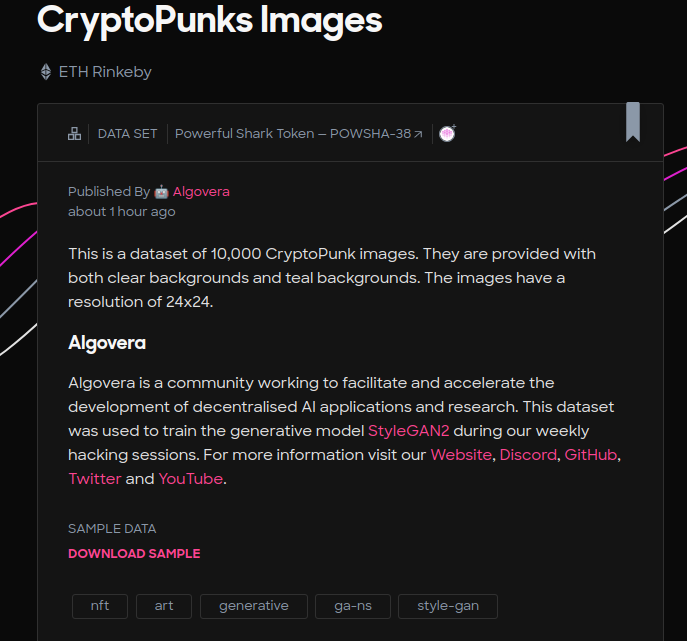

In [3]:
display(Image(filename='../images/download-sample.png', width = 400))

# Step 2: Browse the Ocean Marketplace Using the Ocean Python Library

Now lets do the same through the Ocean Python library. We have installed the library for you in the JupyterHub instance. If you need to do this yourself in future, it's simple (you can view the readme [here](https://github.com/oceanprotocol/ocean.py)). 

We need to connect to the Ethereum network via an Ethereum node. We have set the config parameters for you in a config file. We are currently using [Infura](https://infura.io) for this but will be migrating to a full Ethereum Erigon node asap for increased decentralization. 

In [4]:
!pip install --quiet ocean_lib
!pip install --quiet gdown

In [5]:
#This will eventually be a library

from ocean_lib.ocean.ocean import Ocean
from ocean_lib.config import Config
import ocean_lib as ocean
import numpy as np
import os
import requests

#https://github.com/oceanprotocol/ocean.py/blob/main/READMEs/get-test-OCEAN.md
from eth_account.account import Account
from ocean_lib.web3_internal.wallet import Wallet #might be redundant


def config_ocean(config_f_path):

    config = Config(config_f_path)
    ocean = Ocean(config)

    print(f"config.network_url = '{config.network_url}'")
    print(f"config.metadata_cache_uri = '{config.metadata_cache_uri}'")
    print(f"config.provider_url = '{config.provider_url}'")
    
    return ocean,config

def create_wallet():
    account = Account.create()  #No metamask to create a wallet
    
    wallet = Wallet(ocean.web3, private_key=account.key.hex(),transaction_timeout=20, block_confirmations=config.block_confirmations)
    
    return wallet,wallet.key

    
    
ocean,config = config_ocean("../config.ini")
wallet,a_private = create_wallet()

print("Private K:",a_private)

config.network_url = 'https://rinkeby.infura.io/v3/0df0bbc7adbd4bea90baf9a922d8f5ba'
config.metadata_cache_uri = 'https://aquarius.oceanprotocol.com'
config.provider_url = 'https://provider.rinkeby.oceanprotocol.com'
Private K: 0xdeec6d5f5bbfef1a072895f00e372a0bfe87a62ff982fa6f16a955fba10fd9b4


In [6]:
a_private

'0xdeec6d5f5bbfef1a072895f00e372a0bfe87a62ff982fa6f16a955fba10fd9b4'

Next, export your private key from your metamask wallet. We highly recommend doing this with a wallet that has no real tokens in it (only Rinkeby tokens). For more info on private keys, see [this](https://github.com/oceanprotocol/ocean.py/blob/main/READMEs/wallets.md) from the ocean.py documentation: 

*The whole point of crypto wallets is to store private keys. Wallets have various tradeoffs of cost, convienence, and security. For example, hardware wallets tend to be more secure but less convenient and not free. It can also be useful to store private keys locally on your machine, for testing, though only with a small amount of value at stake (keep the risk down). Do not store your private keys on anything public, unless you want your tokens to disappear. For example, don't store your private keys in GitHub or expose them on frontend webpage code.*

With this in mind, you can directly load your private key into the notebook. We use an envvar rather than storing it in code that might be pushed to a repo. We copy this in for a new session (you may need to restart the notebook server). Here's how we export an environmental variable using an example key (replace this with your actual private key.). From your console:

```console
export MY_TEST_KEY=0xaefd8bc8725c4b3d15fbe058d0f58f4d852e8caea2bf68e0f73acb1aeec19baa
```

Now initialize your wallet:

This should print out the public key of your metamask wallet. Check that it matches the one displayed in your metamask. Let's check the balances in our wallet. These should match the amount you received from the faucets (minus any you've since spent).

# Put money in wallet

In [24]:
from ocean_lib.web3_internal.currency import from_wei # wei is the smallest denomination of ether e.g. like cents
from ocean_lib.models.btoken import BToken #BToken is ERC20
OCEAN_token = BToken(ocean.web3, ocean.OCEAN_address)

print(f"ETH balance = '{from_wei(ocean.web3.eth.get_balance(wallet.address))}'")
print(f"OCEAN balance = '{from_wei(OCEAN_token.balanceOf(wallet.address))}'")

assert from_wei(ocean.web3.eth.get_balance(wallet.address)) > 0 

ETH balance = '0.100000000000000000'
OCEAN balance = '100.000000000000000000'


In [25]:

print("Public Wallet",wallet.address,"in","https://faucet.rinkeby.oceanprotocol.com/","and","https://faucets.chain.link/rinkeby")

Public Wallet 0x34a6e7B1603d0666A56C25Def3b5B7d73EBa094c in https://faucet.rinkeby.oceanprotocol.com/ and https://faucets.chain.link/rinkeby


Now let's download a dataset. For the CryptoPunks Image dataset [here](https://market.oceanprotocol.com/asset/did:op:C9D0568838fa670baEe7195Ea443b32EfCAc2281), copy the decentralized identifier (DID).  

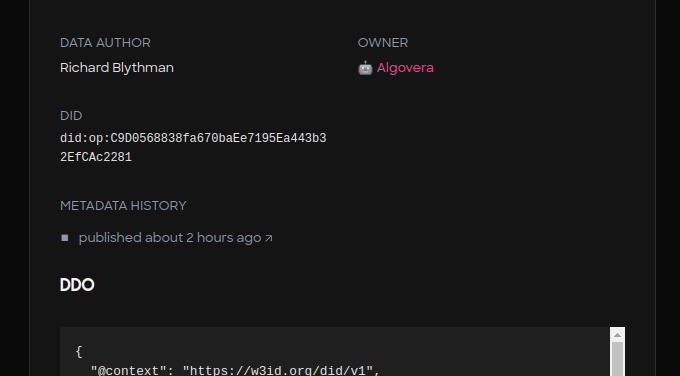

In [9]:
display(Image(filename='../images/did.png', width = 400))

# Get Dataset - Stuck here with implementing the terminal commands of gdown and tarfile to python

In [11]:
from pathlib import Path
import gdown
import tarfile

def get_dataset(dataset_name,output_fn):
    
    #This would ideally be a drop down with the keys as the inputs
    ds = {"punks":"did:op:C9D0568838fa670baEe7195Ea443b32EfCAc2281",
     "VladData":"did:op:72419bf07C6181dAEdc068caB0d81faa2951910e",
     "AvgDenver":"did:op:81607300c6b50fbF0172E9A0038B6e898Fc15d82"
     }

    did = ds[dataset_name]
    asset = ocean.assets.resolve(did)

    sample_link = asset.metadata['additionalInformation']['links'][0]['url']#Needs to be generalized
    ID = Path(sample_link).parts[4]

    download_dir = Path('data')
    dataset_name = f"{dataset_name}-sample"
    download_path = str(download_dir / (dataset_name + '.tgz'))
    if not download_dir.exists():
        download_dir.mkdir(parents=False)
    


    #implementing gdown in python - stuck here
    
    gdown.download(sample_link, output_fn, quiet=False) # !gdown --id {ID} -O {download_path }
    
#     t = tarfile.open("/Users/adamgoldstein/Documents/Crypto/generative-art/data/cryptopunks-sample.tgz",mode="r:gz")
#     t.getnames() # !tar -xvzf {download_path} -C {str(download_dir)}

#     output = '20150428_collected_images.tgz'
    
    
    
get_dataset("punks","20150428_collected_images.tgz")

# get_dataset("VladData","20150428_collected_images.tgz")

# get_dataset("AvgDenver","20150428_collected_images.tgz")

/Users/adamgoldstein/opt/anaconda3/lib/python3.8/site-packages/gdown/parse_url.py:35: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=1d01VQ1plsB8ZIO5VF0LKV2MxdNQjvoCW
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1d01VQ1plsB8ZIO5VF0LKV2MxdNQjvoCW/view?usp=sharing
To: /Users/adamgoldstein/Documents/Crypto/generative-art/notebooks/20150428_collected_images.tgz
70.4kB [00:00, 25.8MB/s]


We can get the URL to the sample data from the associated metadata:

Download the data from the command line (TO DO: fix+streamline this. For now, the sample is downloaded manually in the JupyterHub instance):

* Previous Version

In [13]:
#This would ideally be a drop down with the keys as the inputs
ds = {"punks":"did:op:C9D0568838fa670baEe7195Ea443b32EfCAc2281",
 "VladData":"did:op:72419bf07C6181dAEdc068caB0d81faa2951910e",
 "AvgDenver":"did:op:81607300c6b50fbF0172E9A0038B6e898Fc15d82"
 }

did = ds["punks"]
asset = ocean.assets.resolve(did)

sample_link = asset.metadata['additionalInformation']['links'][0]['url']#Needs to be generalized
ID = Path(sample_link).parts[4]

download_dir = Path('data')
dataset_name = f"punks-sample"
download_path = str(download_dir / ("punks" + '.tgz'))
if not download_dir.exists():
    download_dir.mkdir(parents=True)

In [14]:
!pip install --quiet gdown

In [15]:
!gdown --id {ID} -O {download_path}

Downloading...
From: https://drive.google.com/uc?id=1d01VQ1plsB8ZIO5VF0LKV2MxdNQjvoCW
To: /Users/adamgoldstein/Documents/Crypto/generative-art/notebooks/data/punks.tgz
100%|██████████████████████████████████████| 20.7k/20.7k [00:00<00:00, 25.2MB/s]


Unzip the downloaded file with:

In [16]:
!tar -xvzf {download_path} -C {str(download_dir)}

x punks-sample/
x punks-sample/tealpunks/
x punks-sample/tealpunks/0.png
x punks-sample/tealpunks/1.png
x punks-sample/clearbackgroundpunks/
x punks-sample/clearbackgroundpunks/0.png
x punks-sample/clearbackgroundpunks/1.png


Now lets inspect the sample data. The data provider should provide this in the same format as the whole dataset. This helps us as data scientists to write scripts that run on both the sample data and the whole dataset. We call this the **interface** of the data. 

In [17]:
sample_dir = download_dir / "punks"
print(f"Sub-directories: {sorted(list(sample_dir.glob('*')))}")

Sub-directories: []


We have punks with clear backgrounds and punks with teal backgrounds.

In [18]:
clear_dir, teal_dir = sorted(list(sample_dir.glob('*')))

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
print(f"Images with clear backgrounds: {sorted(list(clear_dir.glob('*')))}")
print(f"Images with clear backgrounds: {sorted(list(teal_dir.glob('*')))}")

In [ ]:
clear_images = sorted(list(clear_dir.glob('*')))
teal_images = sorted(list(teal_dir.glob('*')))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img0 = mpimg.imread(clear_images[0])
img1 = mpimg.imread(clear_images[1])
fig, ax = plt.subplots(1,2)
ax[0].imshow(img0)
ax[1].imshow(img1)
[a.axis('off') for a in ax]
plt.show()

In [ ]:
img0 = mpimg.imread(teal_images[0])
img1 = mpimg.imread(teal_images[1])
fig, ax = plt.subplots(1,2)
ax[0].imshow(img0)
ax[1].imshow(img1)
[a.axis('off') for a in ax]
plt.show()

The next step is to write some code to convert the raw data into a format that runs with StyleGAN2. We could write this on the sample data before sending it to run on the full dataset. 